In [1]:
import pandas
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import math

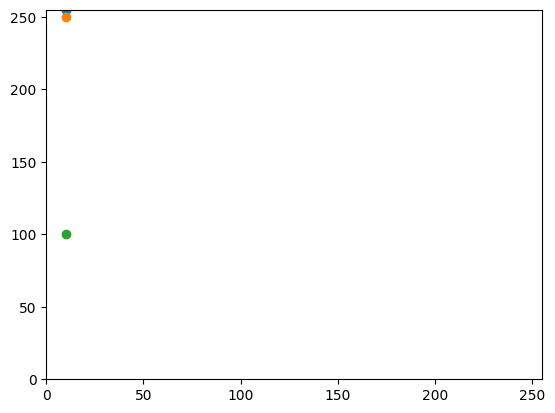

In [2]:
L = 255
X = np.linspace(0, L)

fig, ax = plt.subplots()

ax.axes.set_xlim([0, L])
ax.axes.set_ylim([0, L])

ax.scatter(10, 255)
ax.scatter(10, 250)
ax.scatter(10, 100)

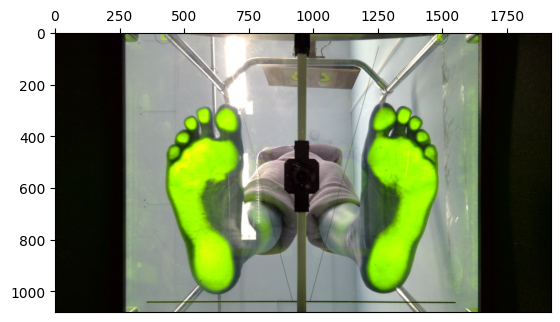

In [3]:
img_file_path = "/home/dima/Documents/альбрехт/обработка изображений/плантограммы/Img (copy 7).png"
img = cv.imread(img_file_path, cv.IMREAD_UNCHANGED)

# cv.imshow('image', img)
fig, ax = plt.subplots(1, 1)


ax.invert_yaxis()
ax.xaxis.tick_top()
image_plot = ax.imshow(img)

Calculating norm using cv.NORM_L1
Calculating norm using cv.NORM_L2
Calculating norm using cv.NORM_MINMAX


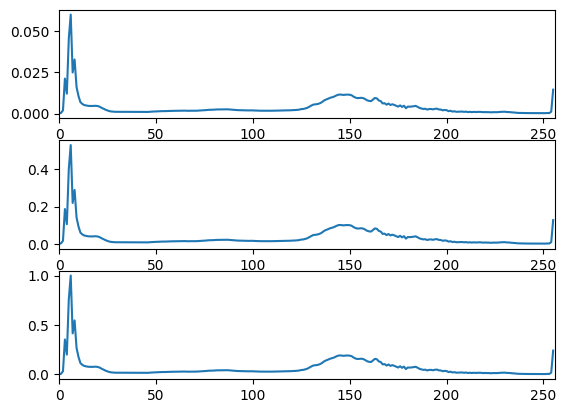

In [4]:
fig, axs = plt.subplots(3, 1)

color = ('b', 'g', 'r')
# for i, col in enumerate(color):
#     ax = axs[i]
#     hist = cv.calcHist([img], [i], None, [256], [0, 256])
#     normHist = cv.normalize(hist, hist, 1, 0, cv.NORM_L2, -1)
#     ax.plot(hist, color=col)
#     ax.set_xlim([0, 256])

hist = cv.calcHist([img], [0], None, [256], [0, 256])

normTypes = [cv.NORM_L1, cv.NORM_L2, cv.NORM_MINMAX]
normNames = 'cv.NORM_L1, cv.NORM_L2, cv.NORM_MINMAX'.split(', ')


for i, normType in enumerate(normTypes):
    ax = axs[i]
    print(f'Calculating norm using {normNames[i]}')
    normHist = cv.normalize(hist, hist, 1, 0, normType, -1)
    ax.plot(normHist)
    ax.set_xlim([0, 256])

plt.show()

In [55]:
img.shape

(1080, 1920, 3)

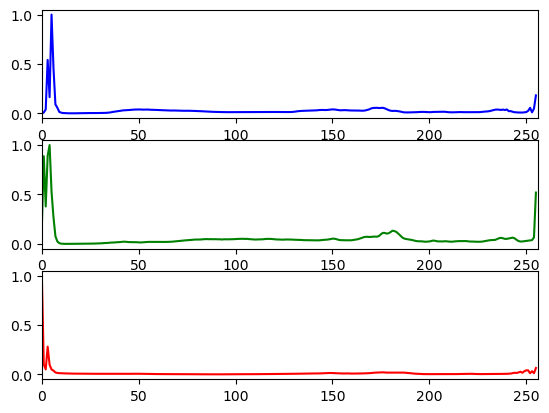

In [54]:
fig, axs = plt.subplots(3, 1)

color = ('b', 'g', 'r')
for i, col in enumerate(color):
    ax = axs[i]
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    normHist = cv.normalize(hist, hist, 1, 0, cv.NORM_MINMAX, -1)
    ax.plot(hist, color=col)
    ax.set_xlim([0, 256])

plt.show()

In [133]:
def hsiToRgb(normImg):
    xEnd, yEnd, channelEnd = normImg.shape

    newImg = np.ndarray((xEnd, yEnd, 3), dtype=np.uint8)
        
    for x in range(xEnd):
        for y in range(yEnd):
            # pixel 
            pixel = np.float32(normImg[x, y, :])

            H, S, I = pixel
            tempH = H / 60
            Z = 1 - abs(tempH % 2  - 1)
            C = 3 * I * S / (1 + Z)

            X = C * Z

            if H == 0:
                R1, G1, B1 = 0, 0, 0
            elif 0 <= tempH <= 1:
                R1, G1, B1 = C, X, 0
            elif 1 <= tempH <= 2:
                R1, G1, B1 = X, C, 0
            elif 2 <= tempH <= 3:
                R1, G1, B1 = 0, C, X
            elif 3 <= tempH <= 4:
                R1, G1, B1 = 0, X, C
            elif 4 <= tempH <= 5:
                R1, G1, B1 = X, 0, C
            elif 5 <= tempH <= 6:
                R1, G1, B1 = C, 0, X

            m = I * (1 - S)
            R, G, B = R1 + m, G1 + m, B1 + m
            newImg[x, y, :] = (R, G, B)

    return newImg

In [134]:
def rgbToHsi(img):
    xEnd, yEnd, channelEnd = img.shape

    newImg = np.ndarray((xEnd, yEnd, 3))
    
    for x in range(xEnd):
        for y in range(yEnd):
            # pixel 
            pixel = np.float32(img[x, y, :])

            M = max(pixel)
            m = min(pixel)
            C = m - M
            
            r, g, b = pixel
            
            I = 1/3 * sum(pixel)
            # S = 1 - 1/I * min(pixel)

            if I == 0:
                S = 0
            else:
                S = 1 - m / I

            # H = math.acos( 1/2 * (r - g + r - b)/math.sqrt( (r - g)^2 + (r - b) * (g - b)) )
            # if b > g:
            #     H = 360 - H

            if C == 0:
                tempH = 0
            elif M == r:
                tempH = ((g - b) / C) % 6
            elif M == g:
                tempH = (b - r) / C + 2
            elif M == b:
                tempH = (r - g) / C + 4

            H = 60 * tempH

            newImg[x, y, :] = [H, S, I]

    return newImg

In [138]:
hsiImg = rgbToHsi(img)

True

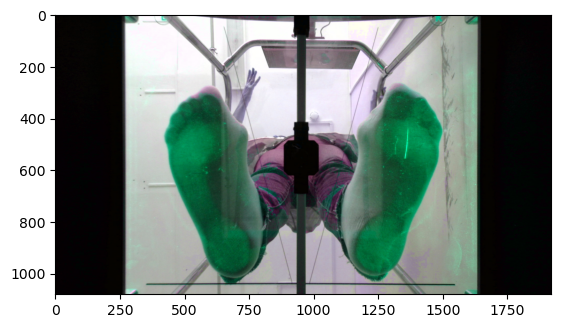

In [140]:
rgbImg = hsiToRgb(hsiImg)

plt.imshow(rgbImg)

In [ ]:
cv.imwrite('/home/dima/Documents/альбрехт/обработка изображений/hsiConvertionLosses.png', rgbImg)

In [104]:
maxH = np.max(hsiImg[:,:,0])
maxS = np.max(hsiImg[:,:,1])
maxI = np.max(hsiImg[:,:,2])

channelMaximums = [maxH, maxS, maxI]
channelQuants = [1, 255, 255]
channelLimits = [360, 256, 256]

channelBins = [
    np.linspace(0, 360, 360),
    np.linspace(0, 1, 255),
    np.linspace(0, 1, 255)
]

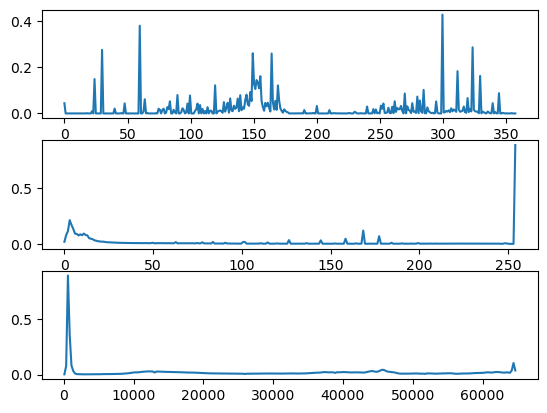

In [126]:
fig, axs = plt.subplots(3, 1)

channel = ('h', 's', 'i')
for i, col in enumerate(channel):
    ax = axs[i]
    channelMaximum = channelMaximums[i]
    channelBin = channelBins[i]
    channelQuant = channelQuants[i]
    prepedImage = np.astype(hsiImg[:,:,i] * channelQuant, np.uint32).flatten()
    # print(prepedImage[0])
    # print(prepedImage.shape)
    hist, binEdges = np.histogram(prepedImage, bins=channelLimits[i])
    # hist = cv.calcHist([np.astype(hsiImg * channelQuant, np.int8)], [i], None, [channelLimits[i]], [0, channelLimits[i]])
    # print(img[:,:,i].flatten().shape)
    # print(hist)
    # ax.hist(prepedImage, bins='auto')
    # print(hist / np.linalg.norm(hist))
    # print(binEdges.shape)
    ax.plot(binEdges[:-1], hist / np.linalg.norm(hist))
    # ax.set_xticks(binEdges)

plt.show()

In [520]:
hsvImg = cv.cvtColor(img, cv.COLOR_RGB2HSV)
lowerGreen = np.array([10, 10, 10])
upperGreen = np.array([60, 255, 255])
mask = cv.inRange(hsvImg, lowerGreen, upperGreen)

res = cv.bitwise_and(hsvImg, hsvImg, mask=mask)

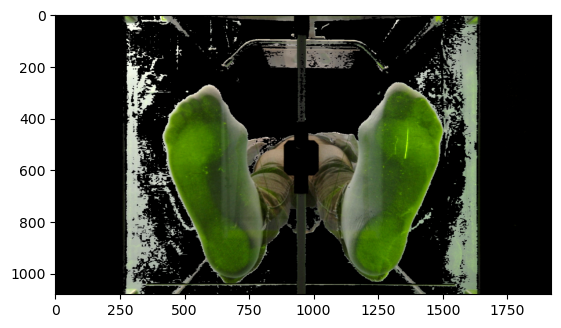

In [521]:
rgbRes = cv.cvtColor(res, cv.COLOR_HSV2RGB)
plt.imshow(rgbRes)

grayRes = cv.cvtColor(res, cv.COLOR_RGB2GRAY)
# edges = cv.Laplacian(grayRes, cv.CV_64FC4)
# plt.imshow(grayRes, cmap='gray')

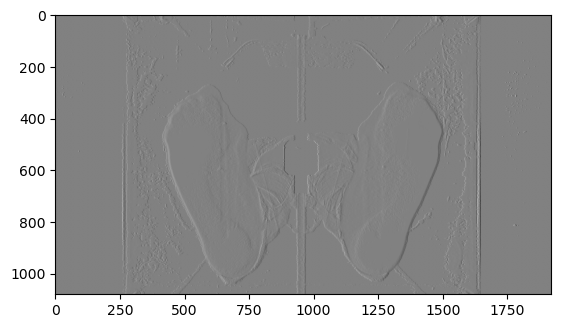

In [418]:
imgGradX = cv.Sobel(grayRes, cv.CV_32F, dx=1, dy=0, ksize=3)
imgGradY = cv.Sobel(grayRes, cv.CV_32F, dx=0, dy=1, ksize=3)

plt.imshow(imgGradX, cmap='gray')

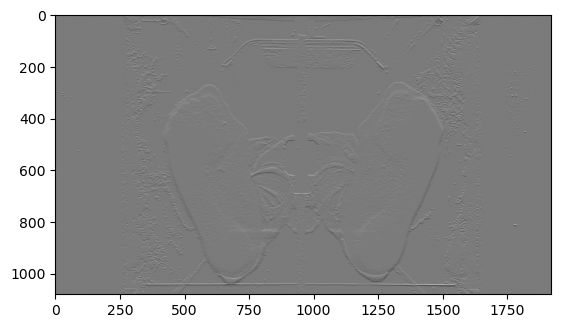

In [419]:
plt.imshow(imgGradY, cmap='gray')

In [267]:
def myNormalizeUInt8(mat):
    ret = ((mat - np.min(mat))/(np.max(mat) - np.min(mat))).astype(np.int32)
    ret *= 255
    return ret

255


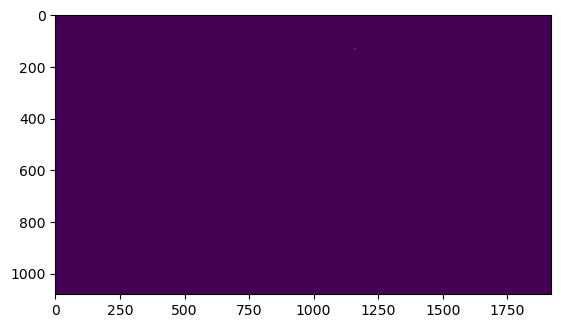

In [254]:
hsvImg = cv.cvtColor(img, cv.COLOR_RGB2HSV)

hue = hsvImg[:,:,0]

hue = ((hue - np.min(hue))/(np.max(hue) - np.min(hue))).astype(np.int32)

hue *= 255

plt.imshow(hue)
print(np.max(hue))

102.03108169367285
255
110.97133680555555
255
93.0209693287037
255


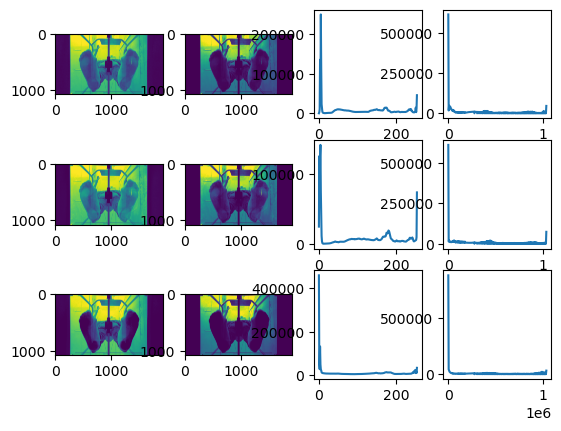

In [283]:
# hsvImg = cv.cvtColor(img)
img_file_path = "/home/dima/Documents/альбрехт/обработка изображений/плантограммы/Img (copy 13).png"
img = cv.imread(img_file_path, cv.IMREAD_UNCHANGED)

img = cv.normalize(img, img, 255, 0, cv.NORM_MINMAX, dtype=-1)

fig, axs = plt.subplots(3, 4)

channelLimits = [360, 256, 256]

channel = ('h', 's', 'i')
for i, channel in enumerate(channel):
    ax = axs[i]
    # channelMaximum = channelMaximums[i]
    # channelBin = channelBins[i]
    # channelQuant = channelQuants[i]
    normImg = img[:,:,i]
    transformedImg = np.pow(normImg, 2.5) * 1
    prepedImage = transformedImg.flatten()
    # print(prepedImage[0])
    # print(prepedImage.shape)
    # hist, binEdges = np.histogram(normImg.flatten(), bins=256)
    # hist = cv.calcHist([np.astype(hsiImg * channelQuant, np.int8)], [i], None, [channelLimits[i]], [0, channelLimits[i]])
    # print(img[:,:,i].flatten().shape)
    # print(hist)
    # ax.hist(prepedImage, bins='auto')
    # print(hist / np.linalg.norm(hist))
    # print(binEdges.shape)
    # ax[0].plot(binEdges[:-1], hist)
    ax[0].imshow(normImg)

    # normImg = myNormalizeUInt8(nthImage)
    ax[1].imshow(transformedImg)
    # ax.set_xticks(binEdges)

    hist, binEdges = np.histogram(normImg.flatten(), bins=256)
    ax[2].plot(binEdges[:-1], hist)

    hist, binEdges = np.histogram(prepedImage, bins=256)
    ax[3].plot(binEdges[:-1], hist)

    print(np.mean(normImg.flatten()))
    print(np.max(normImg))

plt.show()